# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = pd.merge(study_results, mouse_metadata, how='left')

# Display the data table for preview
study_data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
mice = study_data_complete['Mouse ID'].unique()
number_of_mice = len(mice)
print(f'Number of Mice Tested: {number_of_mice}')

Number of Mice Tested: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = study_data_complete[study_data_complete.duplicated(['Mouse ID', 'Timepoint'])]
duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse = study_data_complete[study_data_complete['Mouse ID'] == 'g989']
dup_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_clean = study_data_complete.drop(study_data_complete[study_data_complete["Mouse ID"] == 'g989'].index)
study_data_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = study_data_clean['Mouse ID'].unique()
clean_number_of_mice = len(clean_mice)
print(f'Number of Mice Tested: {clean_number_of_mice}')

Number of Mice Tested: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_drug_grouped = study_data_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median_drug_grouped = study_data_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
vari_drug_grouped = study_data_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
stDev_drug_grouped = study_data_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
SEM_drug_grouped = study_data_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_data = pd.DataFrame({
                'Mean Tumor Volume': mean_drug_grouped,
                'Median Tumor Volume': median_drug_grouped,
                'Tumor Volume Variance': vari_drug_grouped,
                'Tumor Volume Std Dev.': stDev_drug_grouped,
                'Tumor Volume Std Err.': SEM_drug_grouped,
               })
summary_data

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev.,Tumor Volume Std Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

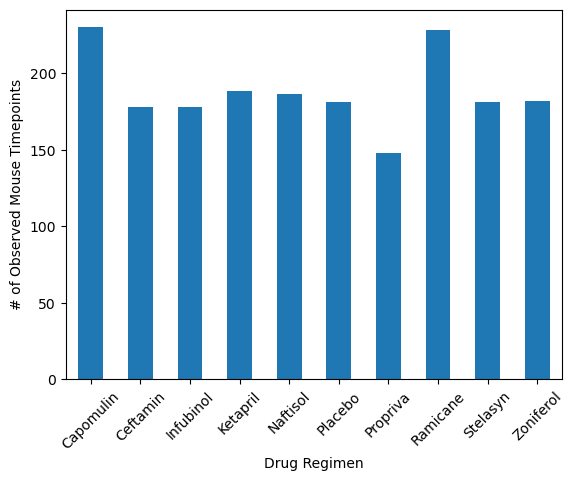

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoints_grouped = study_data_clean.groupby(["Drug Regimen"])["Timepoint"].count()
timepoints_grouped.plot(kind='bar', ylabel="# of Observed Mouse Timepoints", rot=45)

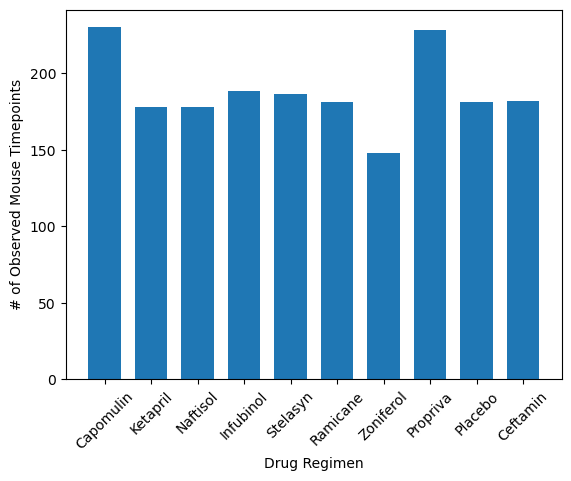

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoints_grouped = study_data_clean.groupby(["Drug Regimen"])["Timepoint"].count()
x_axis = study_data_clean["Drug Regimen"].unique()
plt.bar(x_axis, timepoints_grouped, width=.7)
plt.xticks(rotation=45)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

<Axes: ylabel='Sex'>

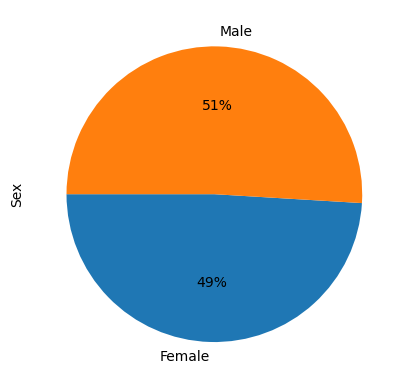

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
study_data_clean.groupby(['Sex']).size().plot.pie(ylabel='Sex', autopct='%1.0f%%', startangle=180)

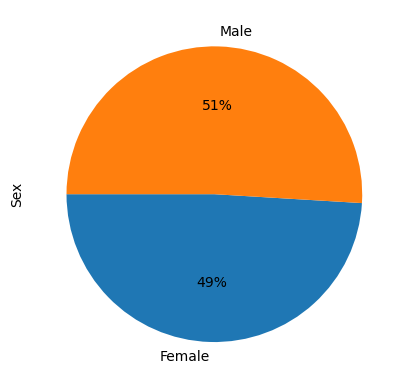

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = study_data_clean.groupby(['Sex']).size()
labels = study_data_clean['Sex'].unique()
plt.pie(sex, labels=labels, autopct='%1.00f%%', startangle=180)
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [13]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [14]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

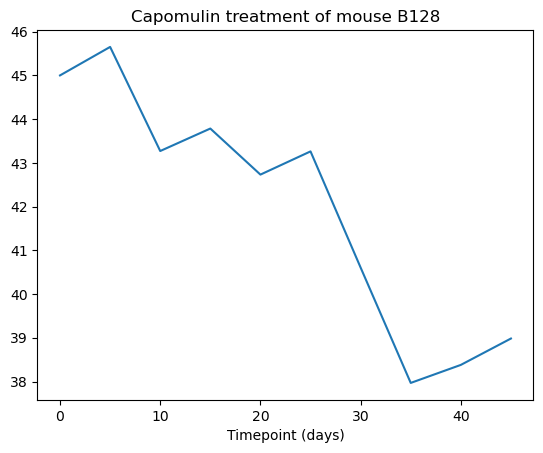

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_information = study_data_clean[study_data_clean['Drug Regimen'] == "Capomulin"]
capomulin_mouse_info = capomulin_information[capomulin_information['Mouse ID'] == "b128"]
timepoints = capomulin_mouse_info['Timepoint']
tumor_volume = capomulin_mouse_info['Tumor Volume (mm3)']
plt.plot(timepoints, tumor_volume)
plt.xlabel("Timepoint (days)")
#plt.ylabel('Tumor Volume (mm3)')
plt.title("Capomulin treatment of mouse B128")
plt.show()

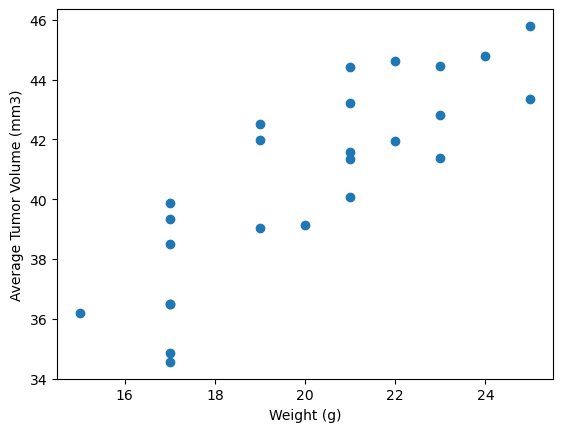

In [16]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_information = study_data_clean[study_data_clean['Drug Regimen'] == "Capomulin"]
avg_tumor = capomulin_information.groupby(['Mouse ID'])["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_information.groupby(["Mouse ID"])["Weight (g)"].unique()
plt.scatter(mouse_weight, avg_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

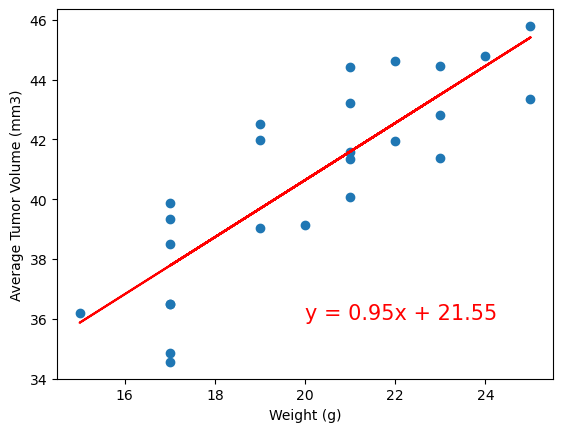

In [21]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_information = study_data_clean[study_data_clean['Drug Regimen'] == "Capomulin"]
avg_tumor = capomulin_information.groupby(['Mouse ID'])["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_information.groupby(["Mouse ID"])["Weight (g)"].unique()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight.astype(float), avg_tumor.astype(float))
regress_values = (mouse_weight * slope) + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(mouse_weight, avg_tumor)
plt.plot(mouse_weight, regress_values, "r-")
plt.annotate(line_eq,(20, 36), fontsize=15, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()